# Create relevant figures for our research paper

In [1]:
import numpy as np
import random
from scipy.signal import spectrogram, stft
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
SEED = 42
nfft=256
fs=32000

### Load the data

In [4]:
x_niko = np.load("data/raw/x_niko.npy")
x_adrian = np.load("data/raw/x_adrian.npy")
x_toni = np.load("data/raw/x_toni.npy")
x_adrian2 = np.load("data/raw/x_adrian2.npy")
x_adrian3 = np.load("data/raw/x_adrian3.npy")
x_raw = np.concatenate((x_adrian, x_niko,x_toni,x_adrian2,x_adrian3), axis=0)

In [5]:
y_niko = np.load("data/raw/y_niko.npy")
y_adrian = np.load("data/raw/y_adrian.npy")
y_toni = np.load("data/raw/y_toni.npy")
y_adrian2 = np.load("data/raw/y_adrian2.npy")
y_adrian3 = np.load("data/raw/y_adrian3.npy")
y_raw = np.concatenate((y_adrian, y_niko,y_toni,np.squeeze(y_adrian2),y_adrian3))

### Visualize raw input examples

In [6]:
neg_example = random.sample(list(np.where(y_raw==0)[0]),1)[0]
pos_example = random.sample(list(np.where(y_raw==1)[0]),1)[0]

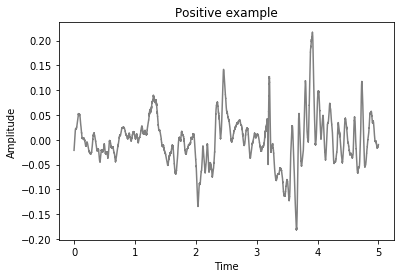

In [10]:
#create y axis
y_axis = list(np.array(list(range(1,160001)))/32000)

f = plt.figure()
plt.plot(y_axis, x_raw[pos_example],color='grey')
plt.title('Positive example')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()
f.savefig("pos_raw.pdf")

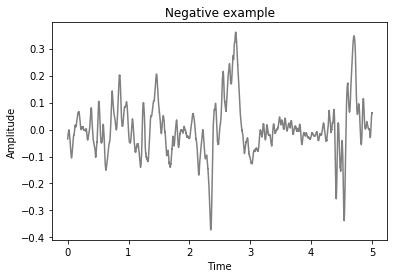

In [8]:
f = plt.figure()
plt.plot(y_axis, x_raw[neg_example], color='grey')
plt.title('Negative example')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()
f.savefig("neg_raw.pdf")

### Apply Fourier Transformation

In [9]:
four_lst = [stft(x,fs=fs,nfft=nfft) for x in list(x_raw)]
x_four = np.abs(np.asarray([four_lst[i][2] for i in range(len(four_lst))]))

### Get the data to log scale

In [11]:
x_log = 10. * np.log10(x_four+np.finfo(float).eps) # from plt.spectrogram

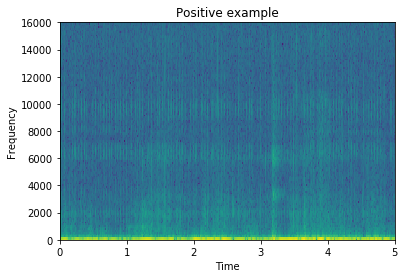

In [12]:
f = plt.figure()
plt.pcolormesh(four_lst[pos_example][1], four_lst[pos_example][0], x_log[pos_example])
plt.title('Positive example')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()
f.savefig("pos_fourier.pdf")

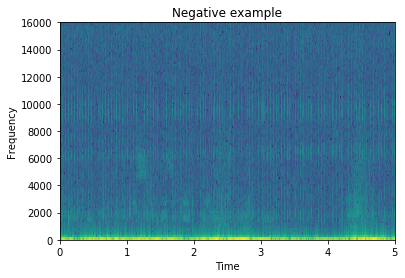

In [13]:
f = plt.figure()
plt.pcolormesh(four_lst[neg_example][1], four_lst[neg_example][0], x_log[neg_example])
plt.title('Negative example')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()
f.savefig("neg_fourier.pdf")

In [14]:
x_shape = x_log.reshape((x_log.shape[0],x_log.shape[1],x_log.shape[2], 1))
x_shape = x_shape[:,:,:-1,:]

### Normalize the data

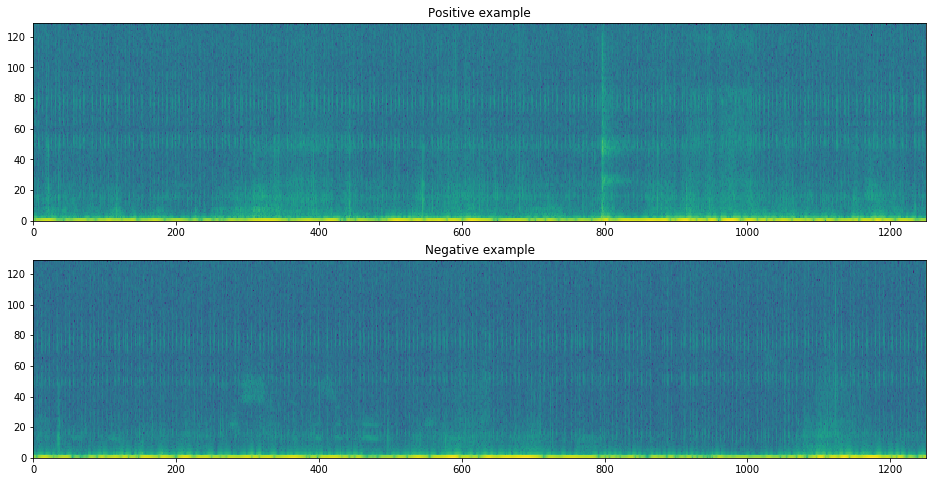

In [15]:
fig, axes = plt.subplots(2, 1,figsize=(16,8))
axes[0].pcolormesh(x_shape[pos_example,:,:,-1])
axes[0].set_title('Positive example')
axes[1].pcolormesh(x_shape[neg_example,:,:,-1])
axes[1].set_title('Negative example')
_=fig

From https://www.researchgate.net/post/What_is_the_correct_way_of_normalizing_an_audio_signal:
- It really depends on what the objective of the normalisation is. Unless you have some way of explicitly calibrating the sound pressure level to which a quantisation level corresponds, you probably don't want to overcomplicate it. I would also suggest that normalising it to the peak absolute value is not a very useful approach under any circumstances - firstly, you probably have a small DC offset, so you want to first subtract the mean, and secondly, you may have some impulse noise present - which would give you a rather misleading result as you may end up with a very much lower-amplitude signal than you expect.
- You could normalise signal power by computing the average power of the signal and then scaling the signal such that the average power is unity. However, if your signal is music or speech, this will tend to be skewed by quiet parts of the signal - it really only makes sense if the signal has a roughly constant power envelope. There is no 'correct' way to do this which is suitable for all cases.

In [16]:
#create train and test split
x_train, x_test, y_train, y_test = train_test_split(x_shape, y_raw, test_size=TEST_SPLIT, random_state=SEED)

NameError: name 'TEST_SPLIT' is not defined

In [ ]:
norm_mean = x_train.mean()
norm_std = x_train.std()
norm_max = x_train.max()

In [ ]:
x_train = (x_train-norm_mean)/norm_std
x_test = (x_test-norm_mean)/norm_std

### Visualize the final data distribution

In [ ]:
f = plt.figure()
plt.hist(x_train[pos_example,:,:,-1].flatten(), 50, density=True, facecolor='grey', alpha=0.75)
plt.title('Positive examples')
plt.xlabel('Amplitude')
plt.ylabel('Density')
plt.show()
f.savefig("pos_hist.pdf")

In [ ]:
f = plt.figure()
plt.hist(x_train[neg_example,:,:,-1].flatten(), 50, density=True, facecolor='grey', alpha=0.75)
plt.title('Negative examples')
plt.xlabel('Amplitude')
plt.ylabel('Density')
plt.show()
f.savefig("neg_hist.pdf")